In [1]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt

In [61]:
resultDate = "final"

csvsPath = f"../src/EntityFX.MqttSimulator/EntityFX.MqttY.MqttRelay.App/bin/Release/net6.0/stats/{resultDate}"

cwd = os.getcwd()

csvFiles = []
for file in pathlib.Path(csvsPath).rglob('*.csv'):
    csvFiles.append(file)

if not os.path.isdir(resultDate):
    os.mkdir(resultDate)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


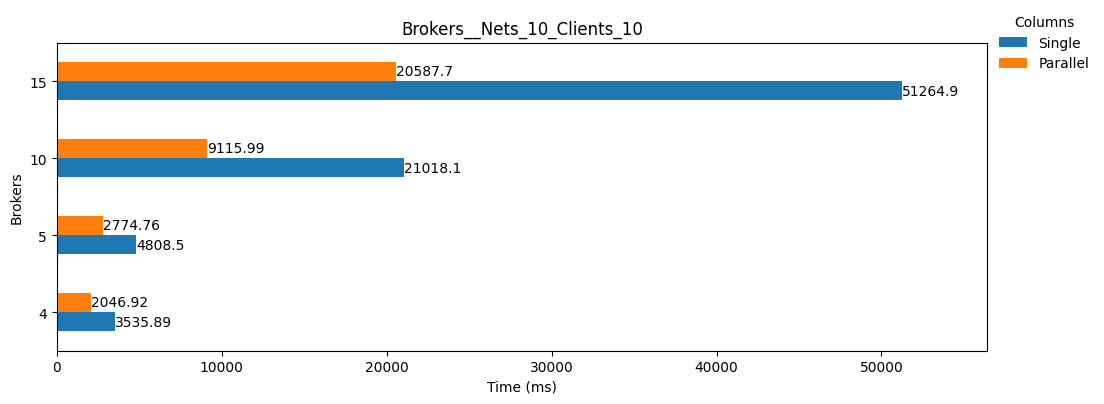

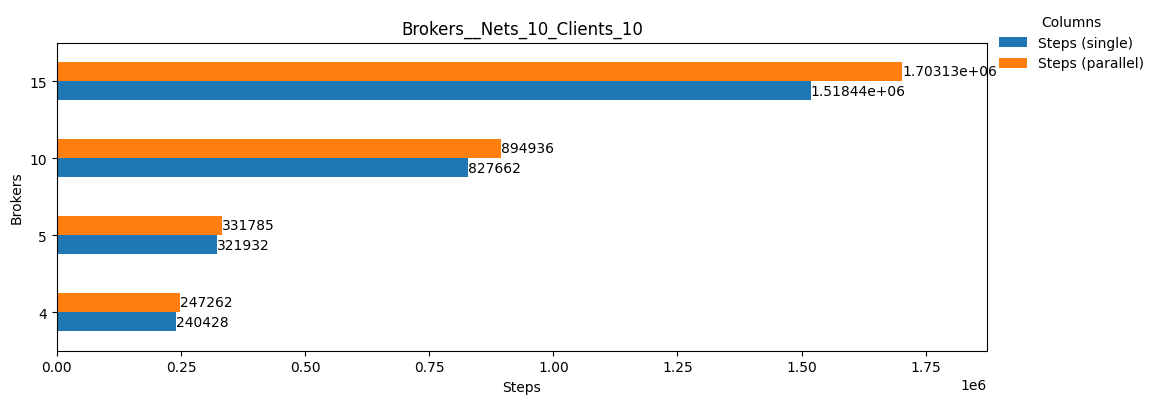

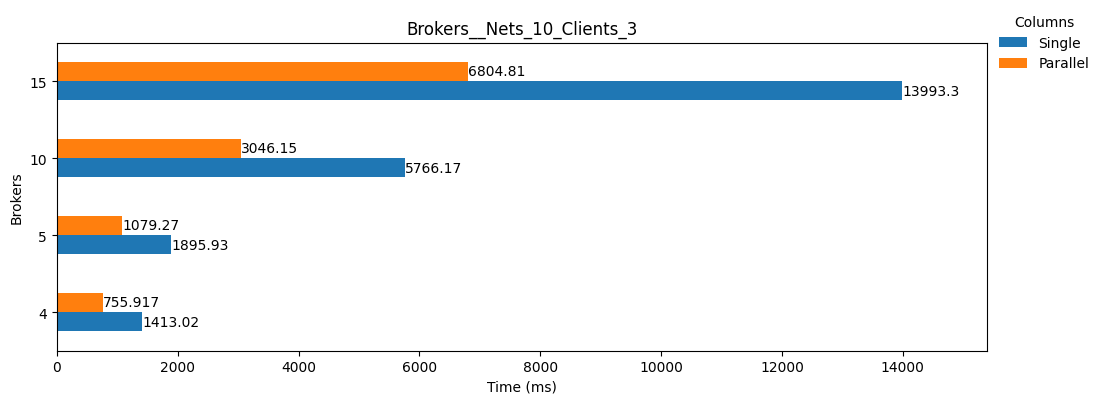

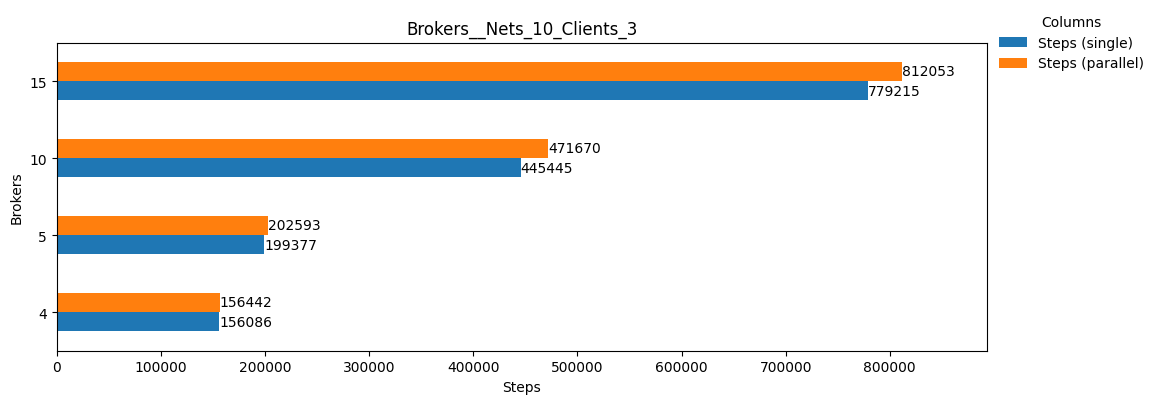

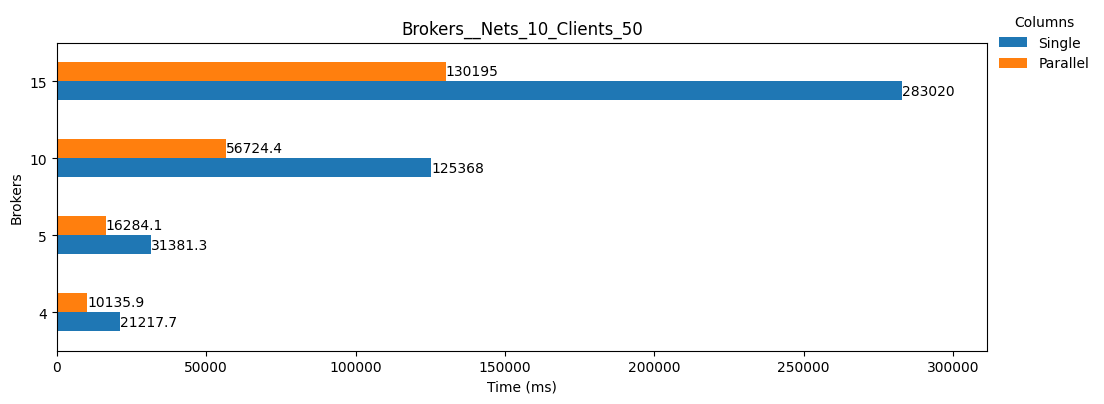

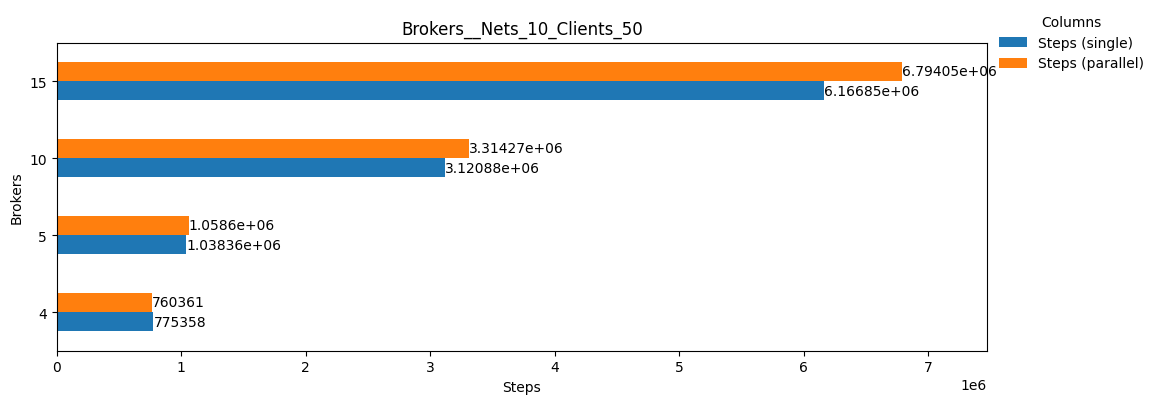

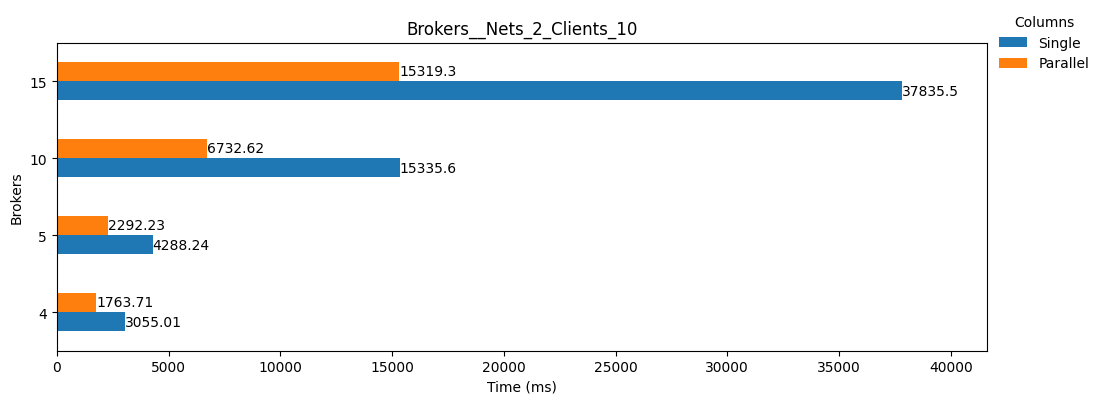

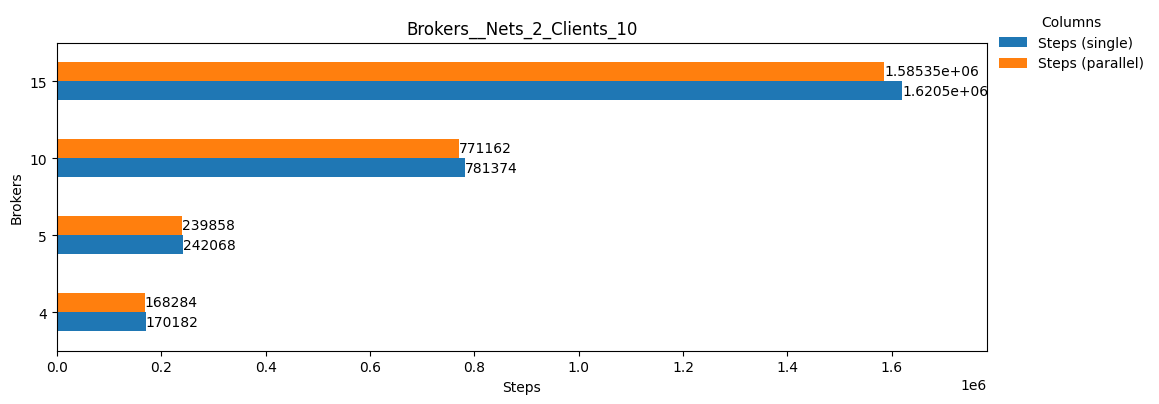

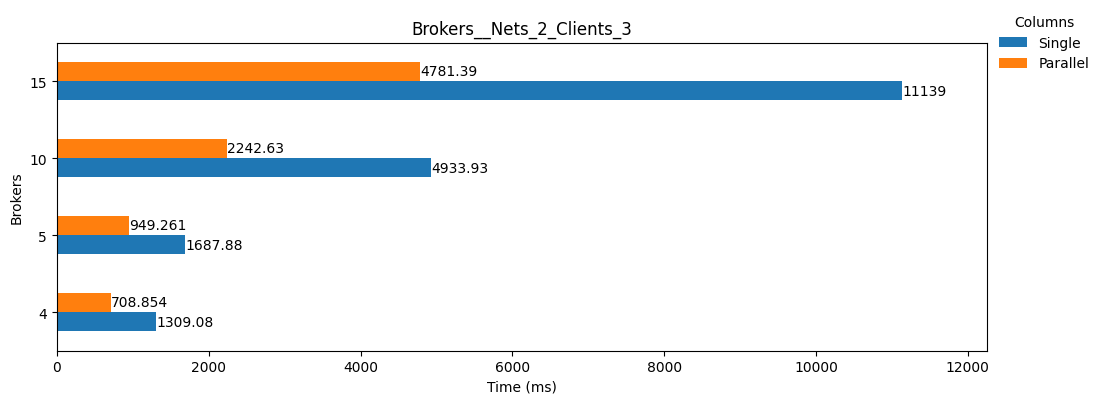

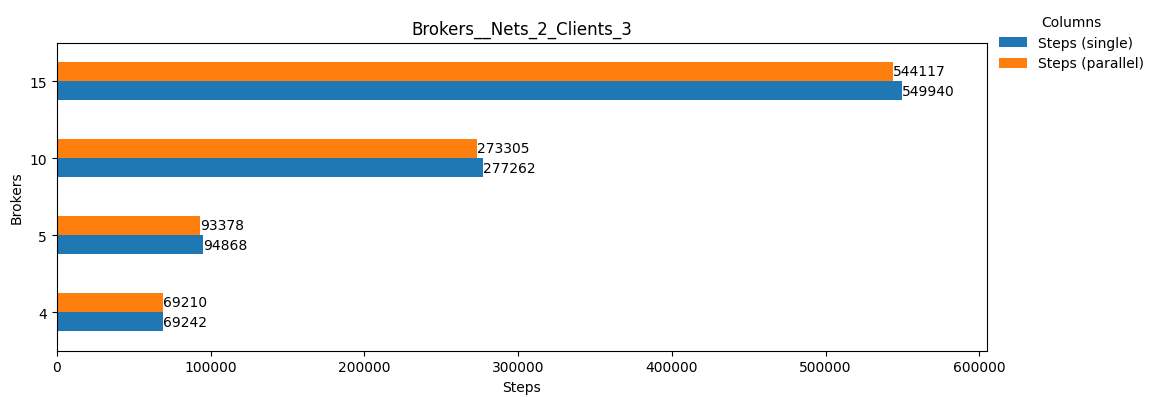

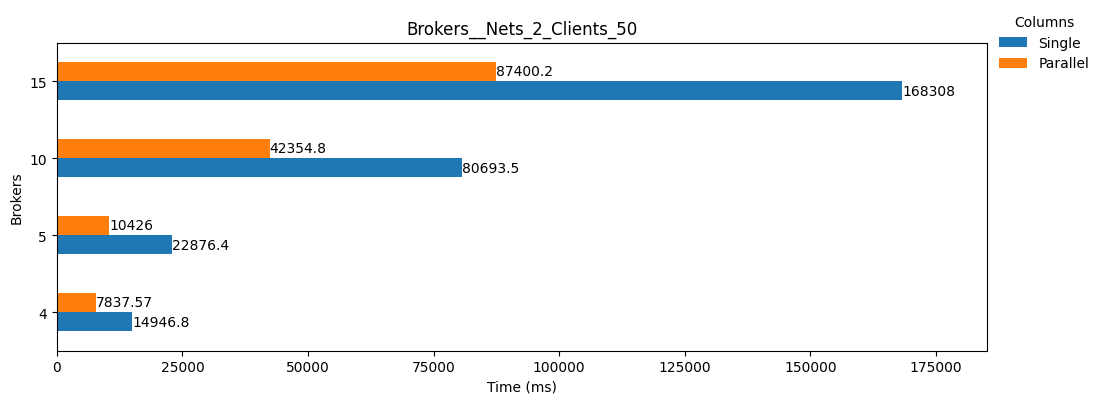

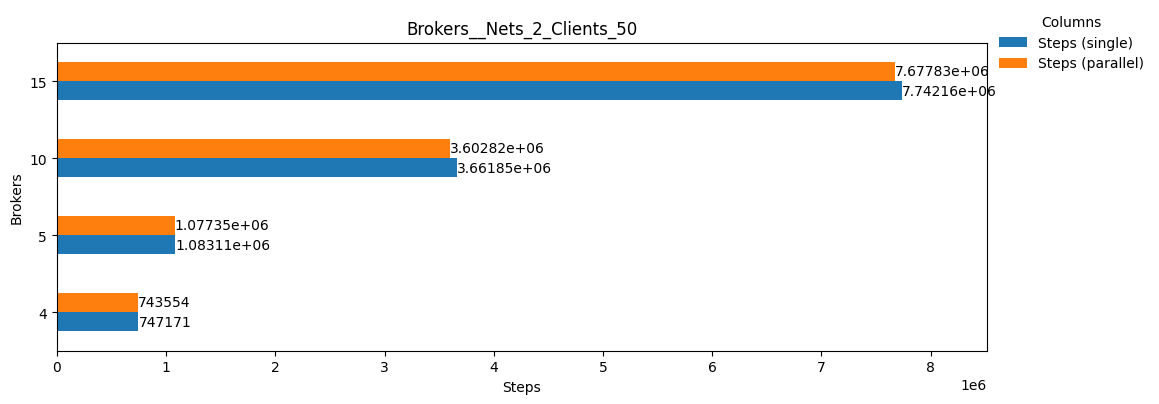

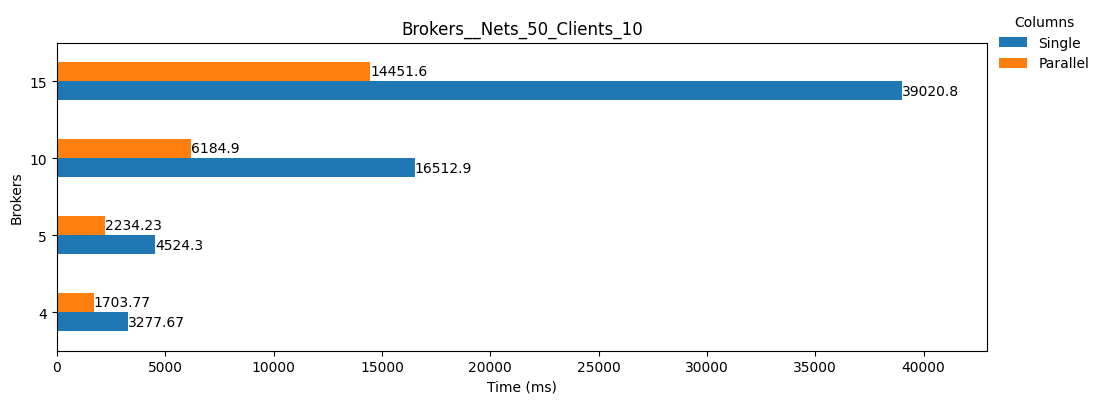

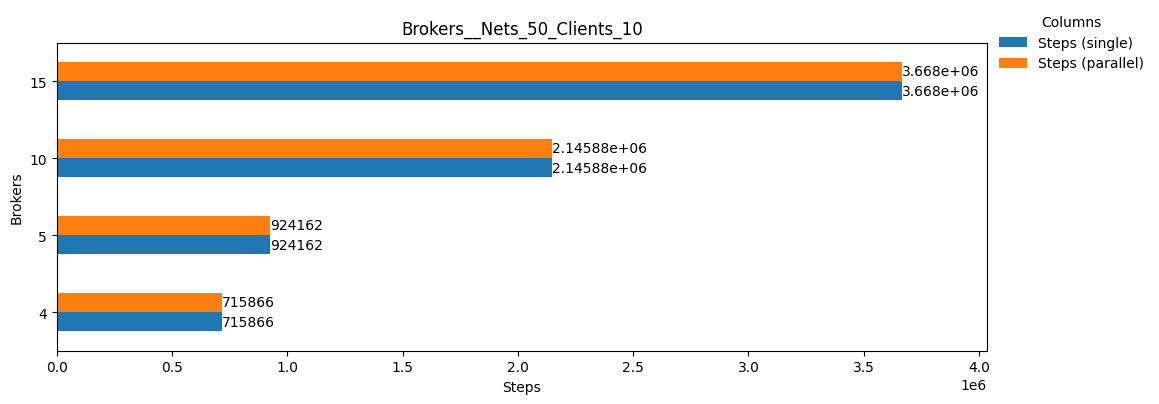

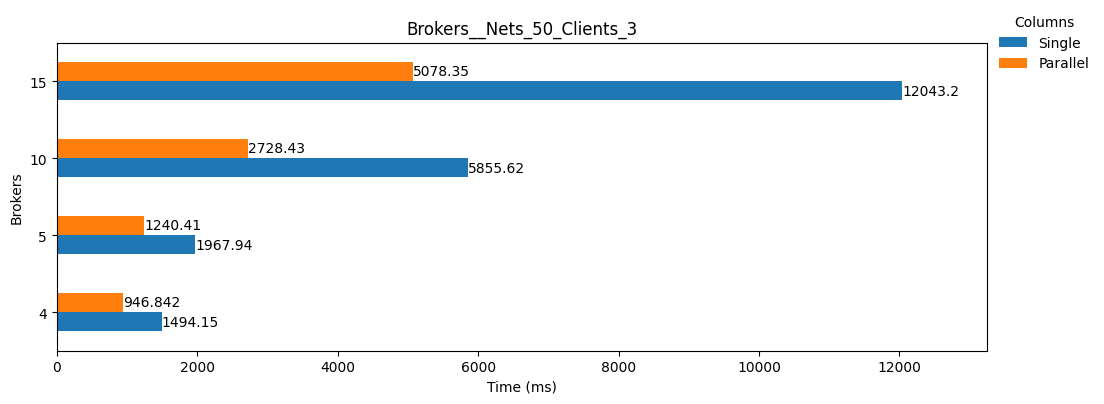

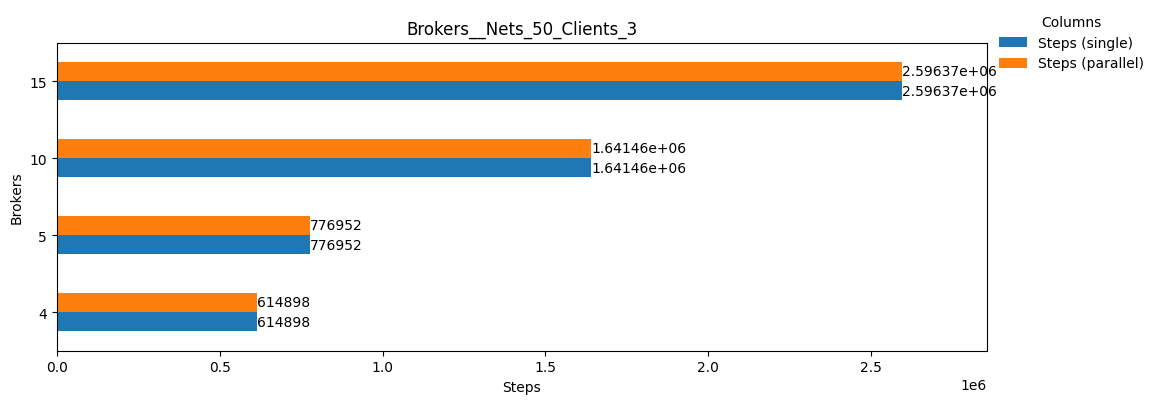

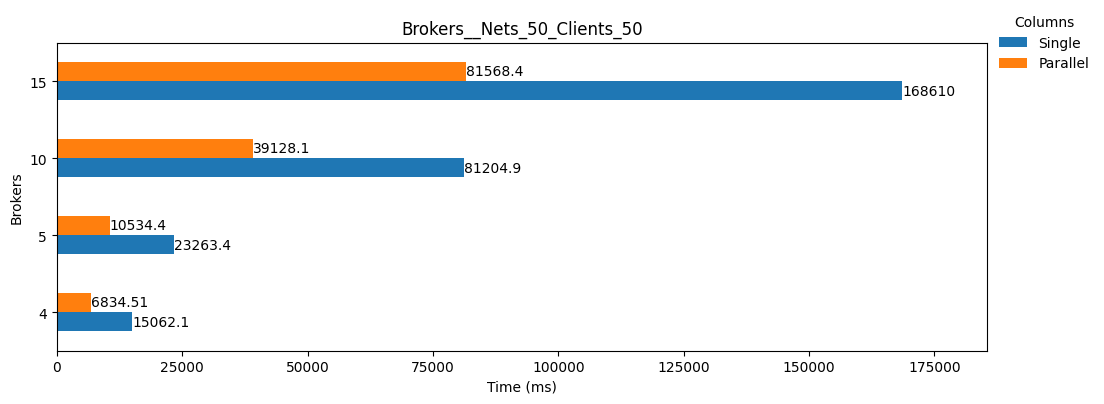

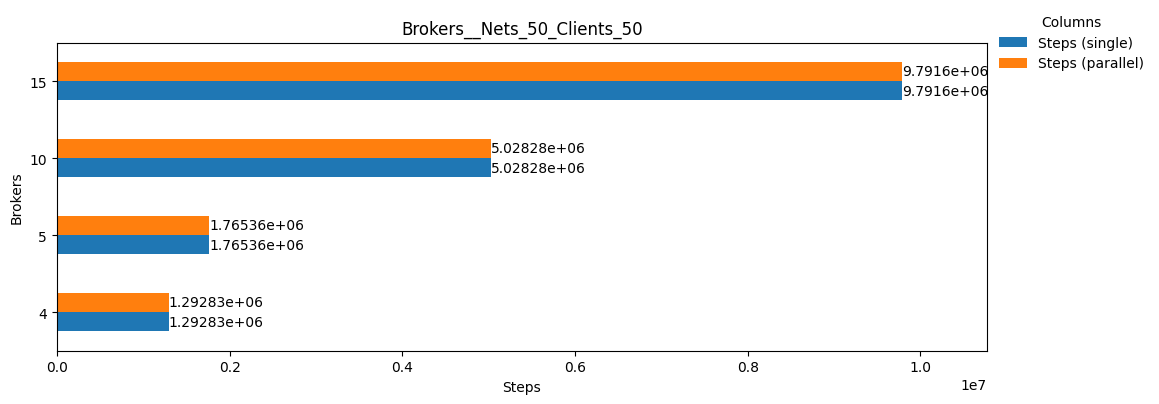

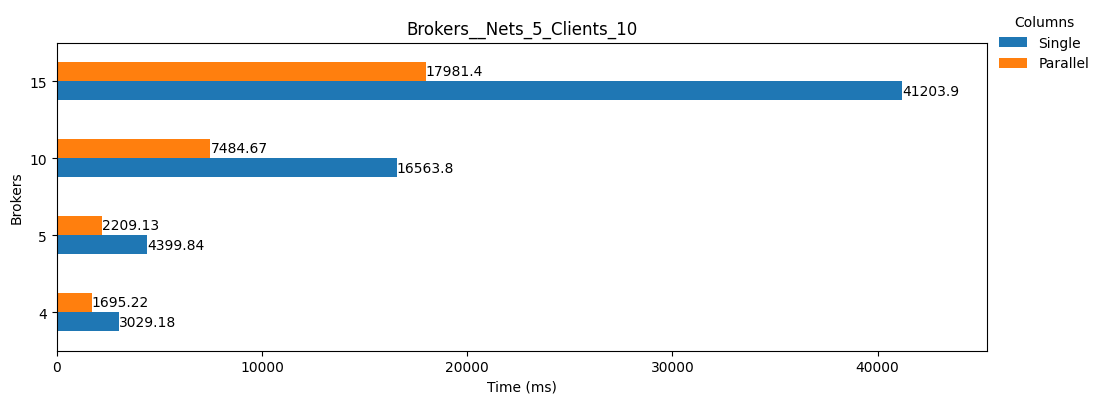

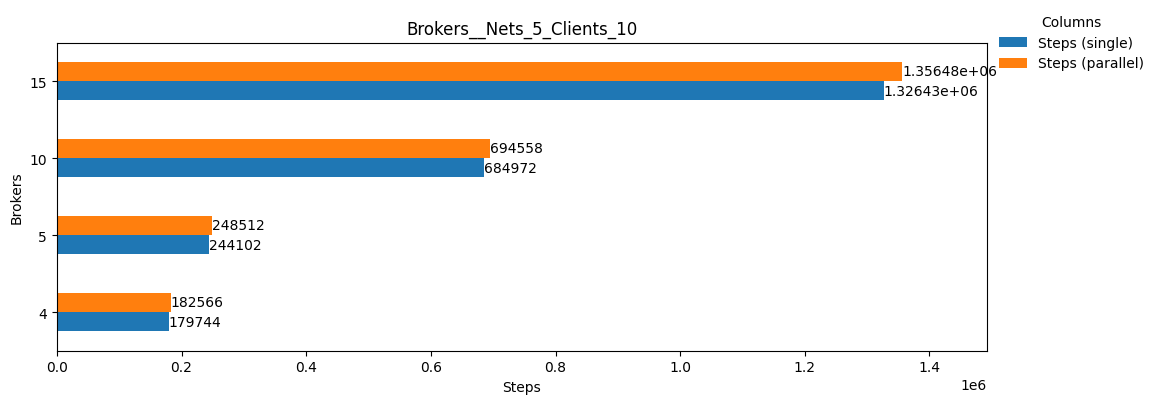

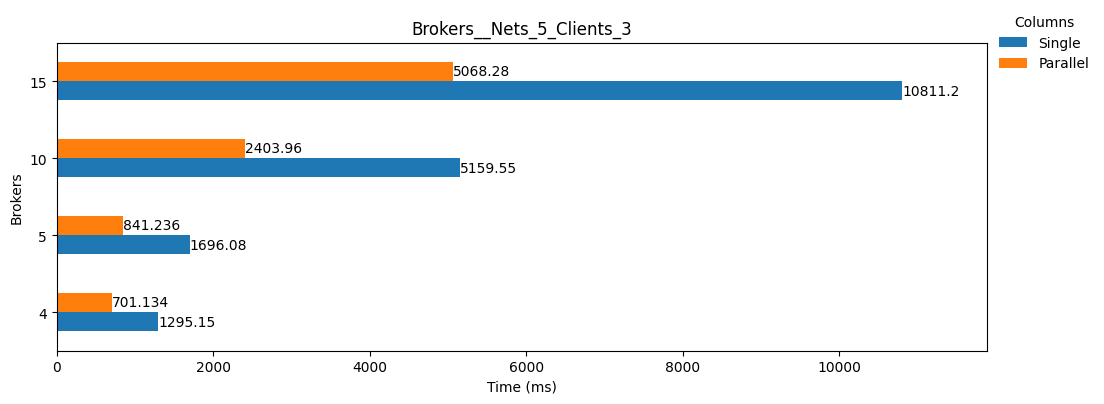

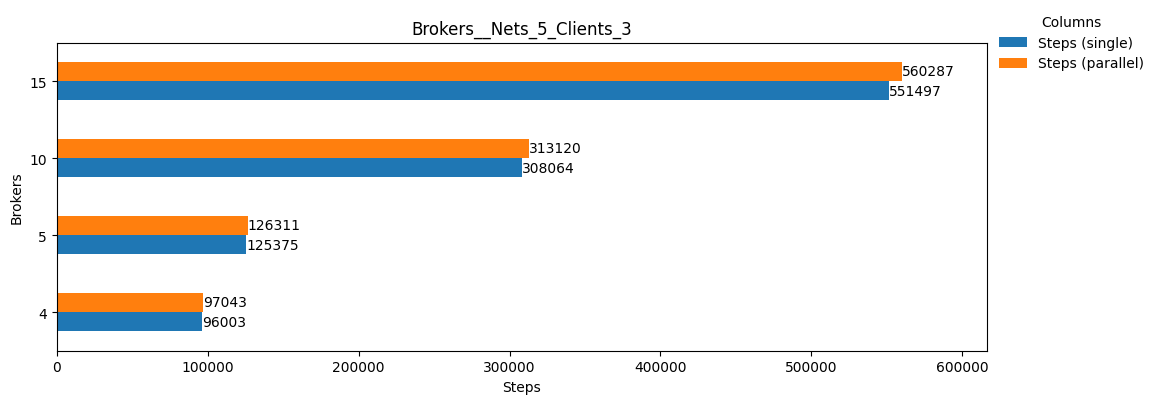

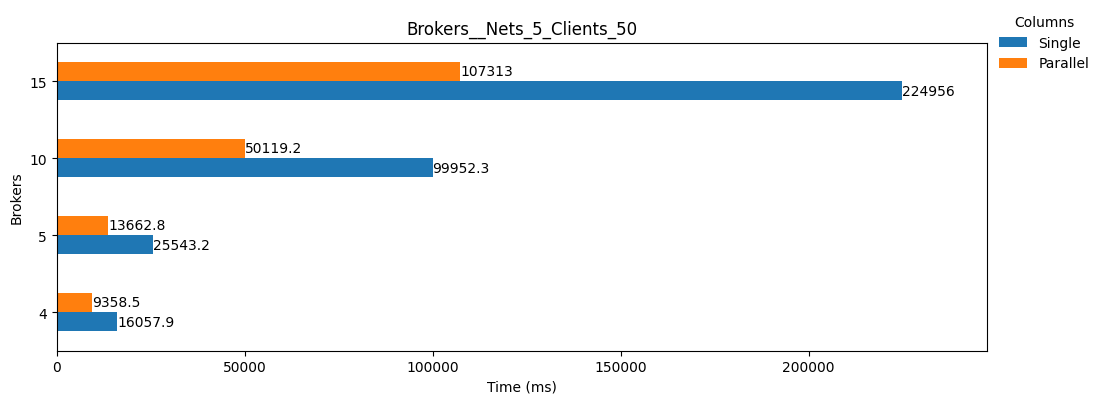

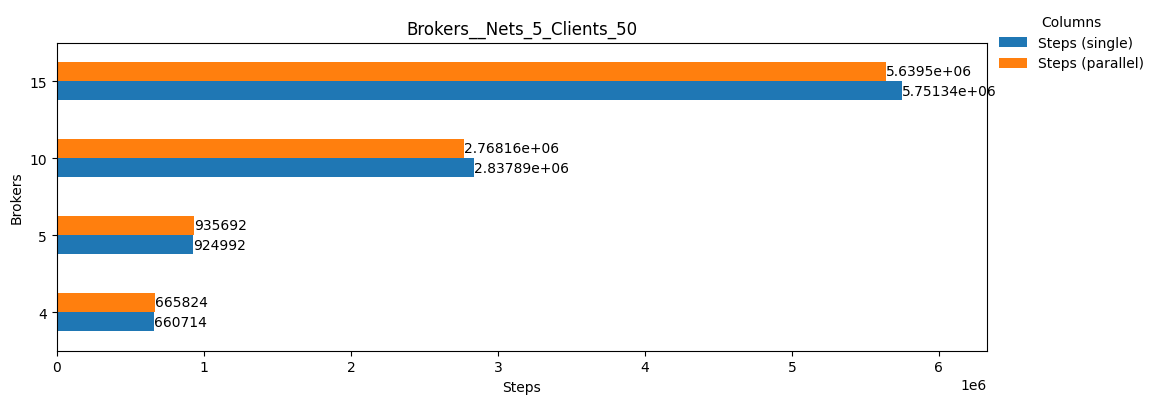

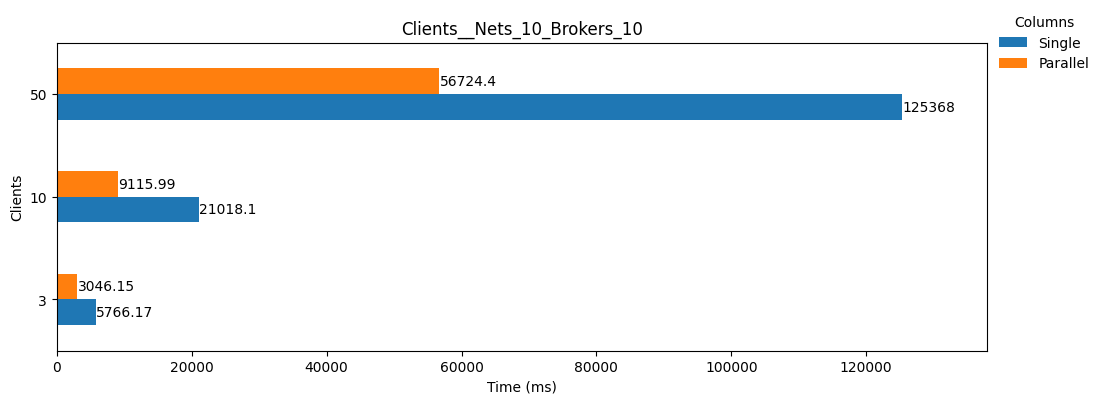

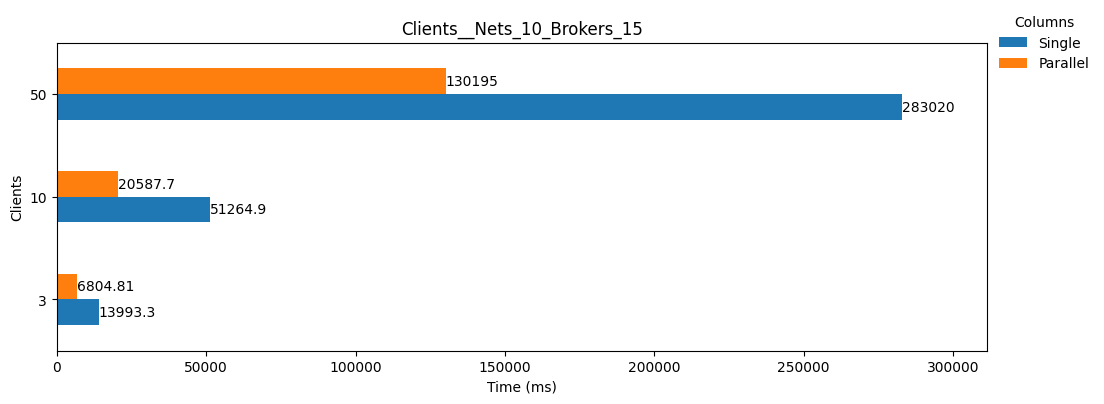

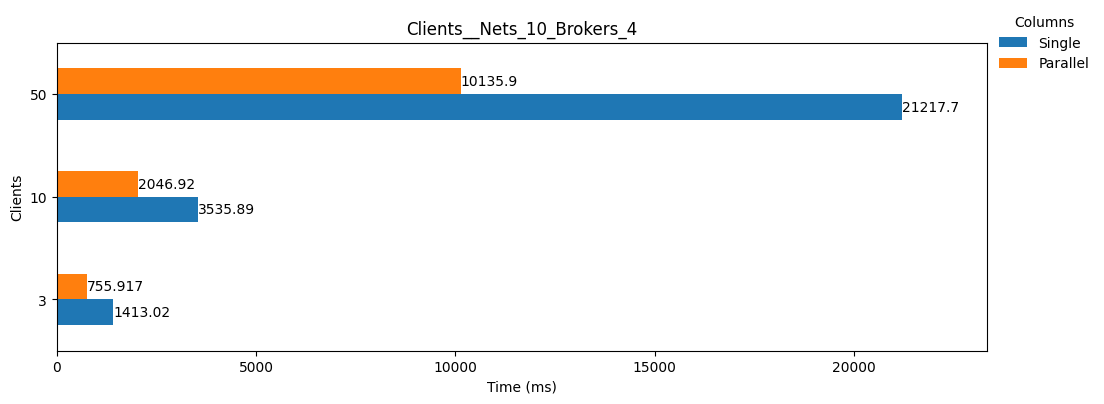

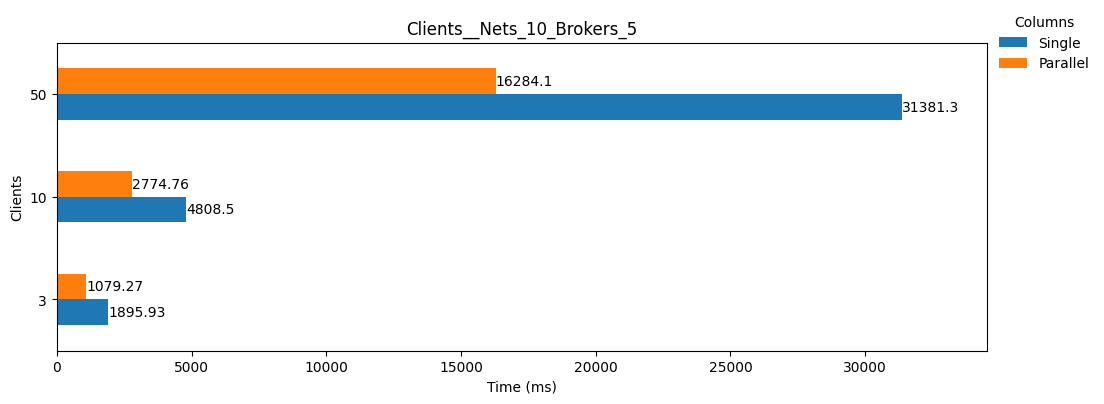

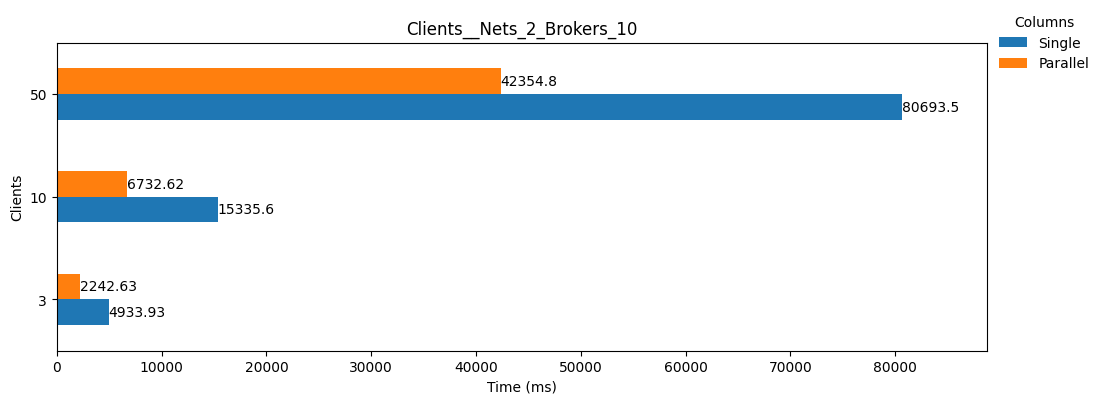

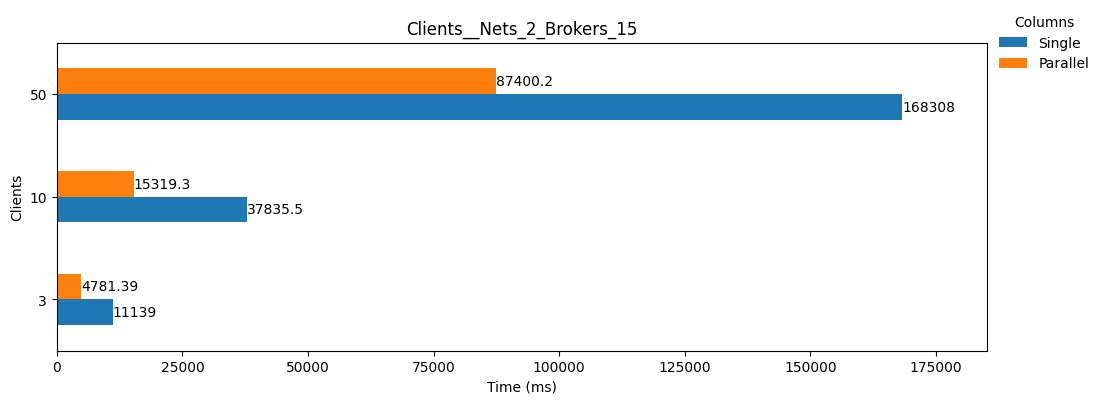

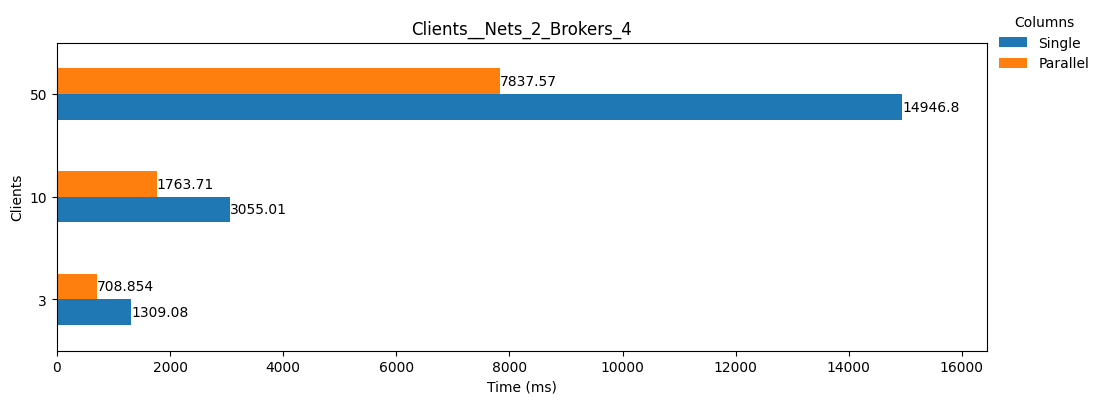

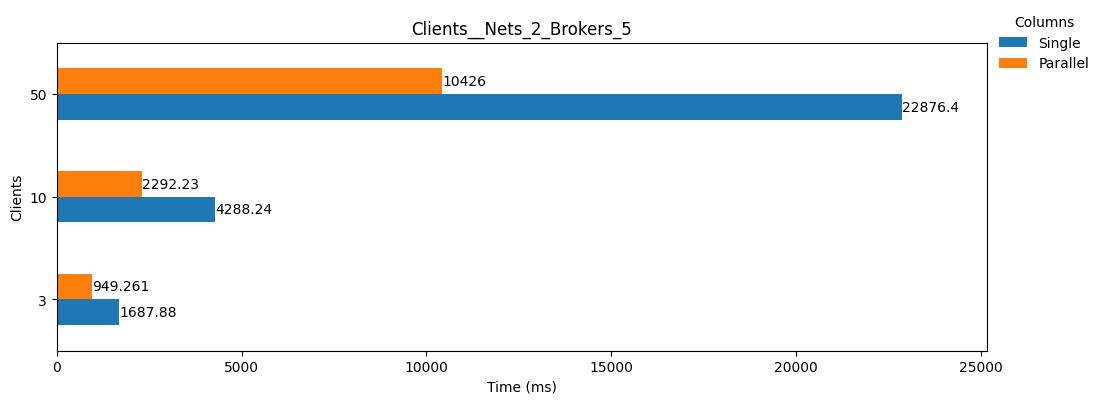

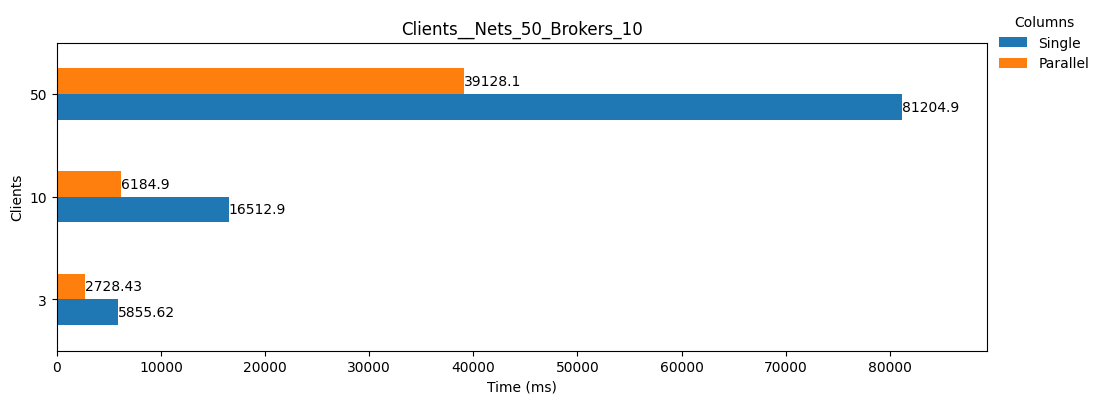

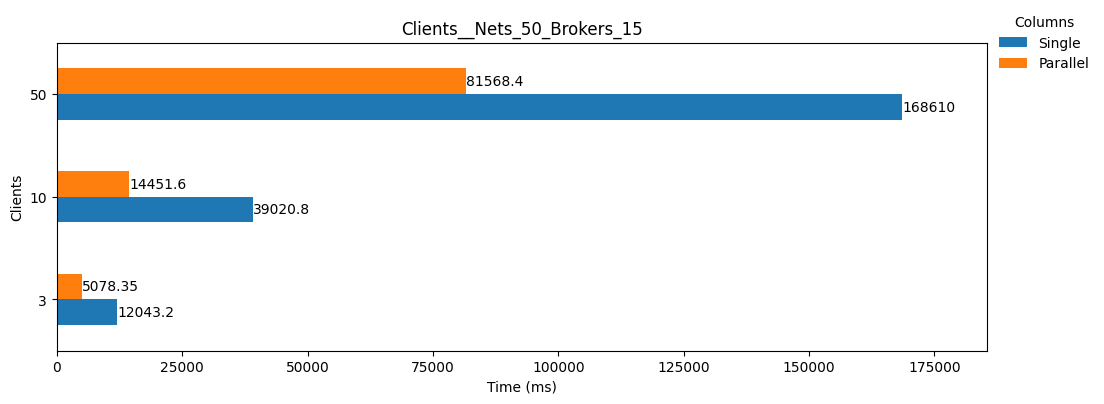

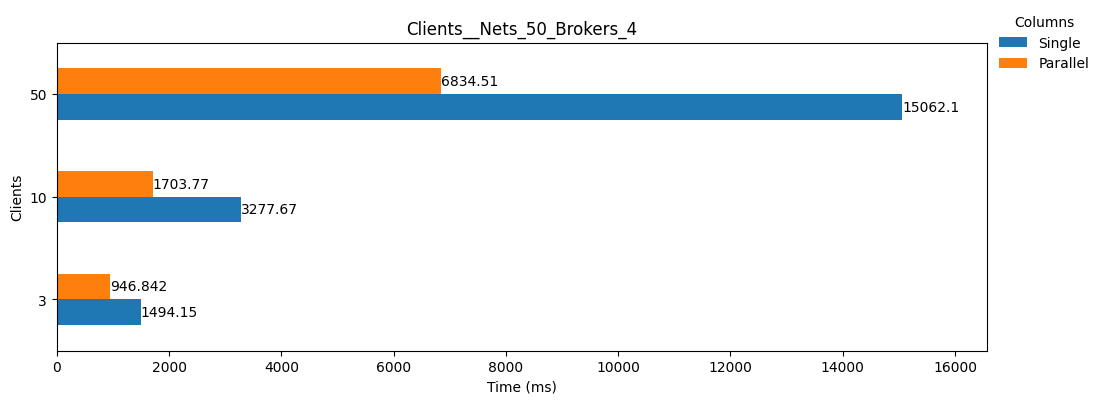

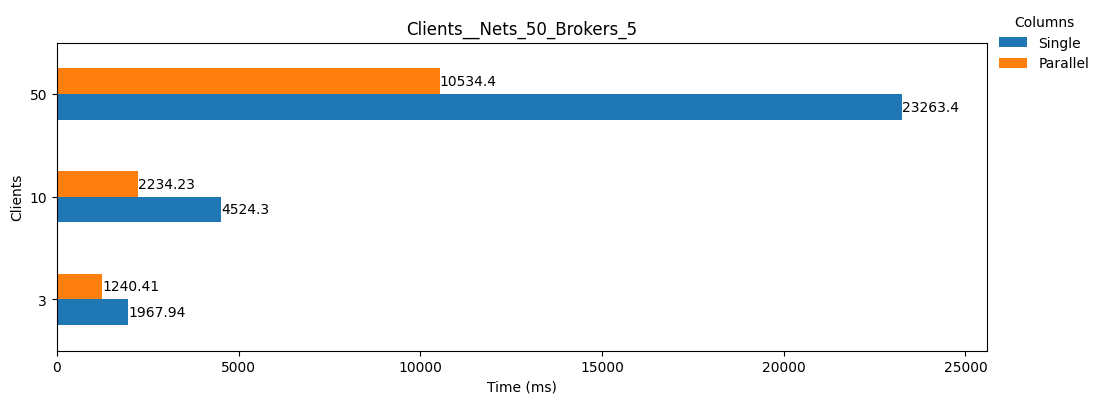

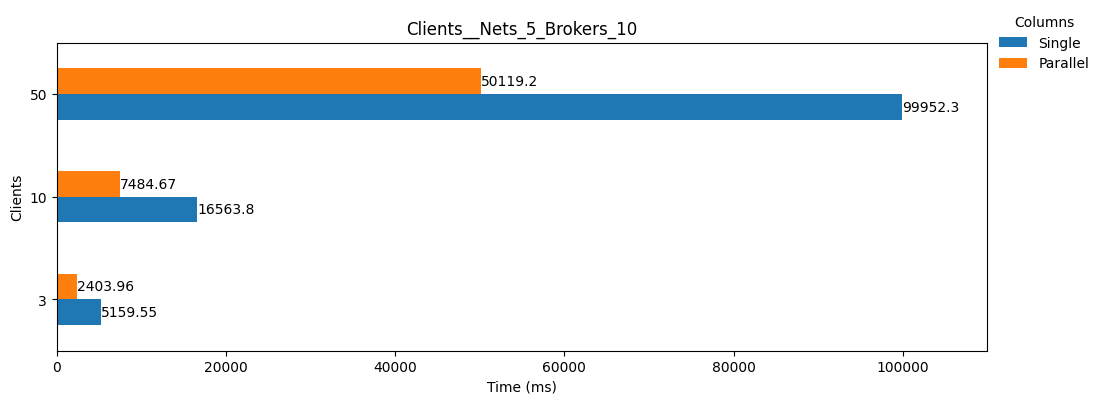

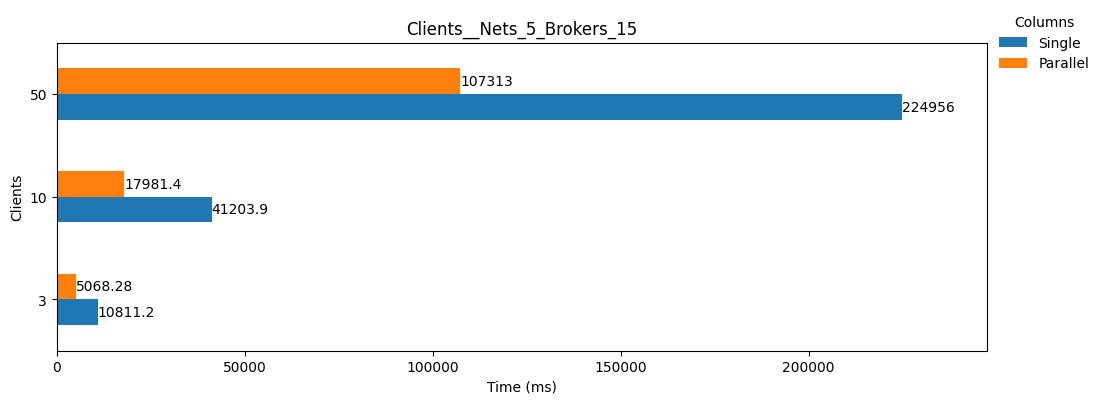

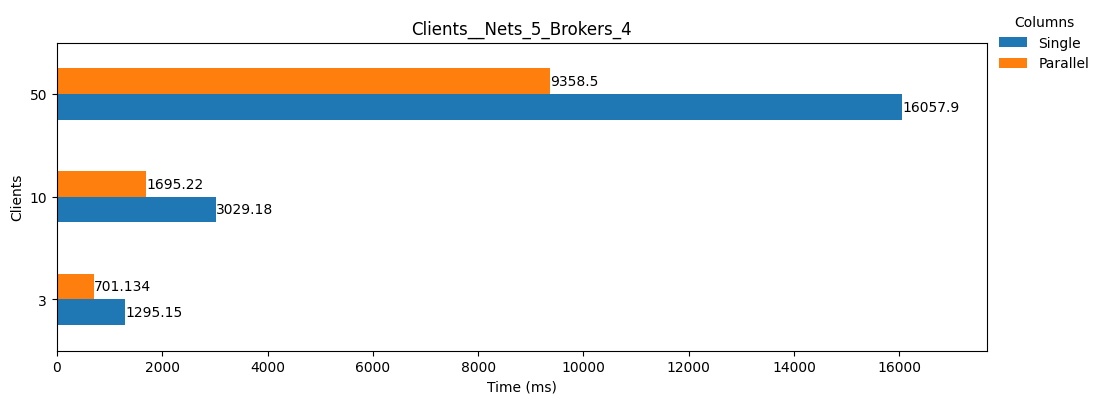

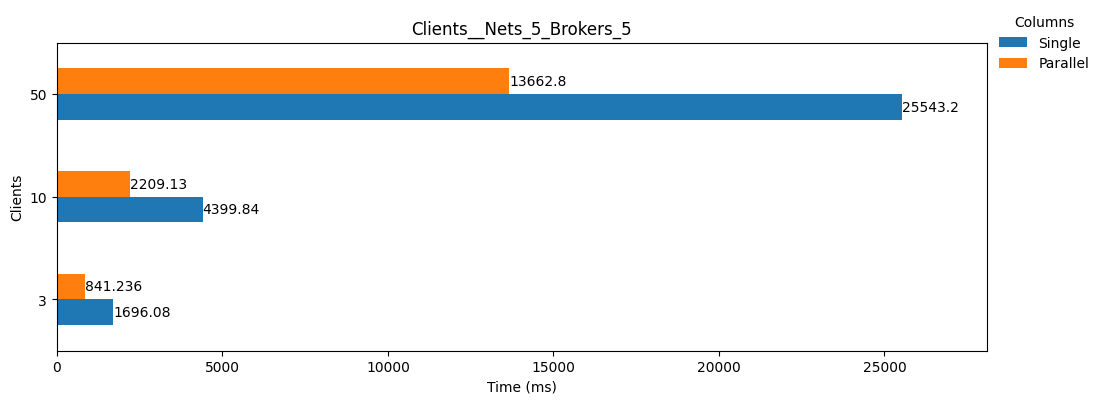

In [62]:

def generate_figure(header, plotPictureName, sub, xlabel, ylabel):
    ax = sub.plot(kind='barh', ylabel=ylabel, title=header, figsize=(12, 4))

    ax.set(xlabel=xlabel)
    for c in ax.containers:
        # set the bar label
        ax.bar_label(c, label_type='edge')
    
    ax.margins(x=0.1)
    ax.legend(title='Columns', bbox_to_anchor=(1, 1), loc='center left', frameon=False)
    
    fig = ax.get_figure()
    fig.savefig(f"{resultDate}/{plotPictureName}")

for csv in csvFiles:
    df = pd.read_csv(csv, delimiter=';',decimal='.', encoding="utf8")
    df.head()

    if df.empty:
        continue

    header = csv.stem
    #header = str(csv).replace('\\','/').replace(csvsPath, ' ')

    if header.startswith("Brokers") :
        plotPictureName = f"{header}_realTime.png"
        realTimeData = {
            'Single' : df['RealTime [Single] (ms)'].to_list(),
            'Parallel' : df['RealTime [Parallel] (ms)'].to_list()
        }
        sub = pd.DataFrame(data=realTimeData, index=df['Brokers'])
        generate_figure(header, plotPictureName, sub, 'Time (ms)', 'Brokers')

        plotPictureName = f"{header}_steps.png"
        stepsData = {
            'Steps (single)' : df['TotalSteps [Single]'].to_list(),
            'Steps (parallel)' : df['TotalSteps [Parallel]'].to_list()
        }
        sub = pd.DataFrame(data=stepsData, index=df['Brokers'])
        generate_figure(header, plotPictureName, sub, 'Steps', 'Brokers')
    elif  header.startswith("Clients") :
        plotPictureName = f"{header}_realTime.png"
        realTimeData = {
            'Single' : df['RealTime [Single] (ms)'].to_list(),
            'Parallel' : df['RealTime [Parallel] (ms)'].to_list()
        }
        sub = pd.DataFrame(data=realTimeData, index=df['Clients'])
        generate_figure(header, plotPictureName, sub, 'Time (ms)', 'Clients')



